In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [358]:
train_df = pd.read_csv('candy_train.csv')
test_df = pd.read_csv('candy_test.csv')

In [359]:
train_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
1,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
2,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
3,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
4,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140


In [360]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    68 non-null     object 
 1   chocolate         68 non-null     int64  
 2   fruity            68 non-null     int64  
 3   caramel           68 non-null     int64  
 4   peanutyalmondy    68 non-null     int64  
 5   nougat            68 non-null     int64  
 6   crispedricewafer  68 non-null     int64  
 7   hard              68 non-null     int64  
 8   bar               68 non-null     int64  
 9   pluribus          68 non-null     int64  
 10  sugarpercent      68 non-null     float64
 11  pricepercent      68 non-null     float64
 12  winpercent        68 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 7.0+ KB


In [361]:
train_df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.455882,0.441176,0.191176,0.191176,0.102941,0.102941,0.147059,0.294118,0.485294,0.474632,0.496603,51.531087
std,0.501753,0.500219,0.396151,0.396151,0.306141,0.306141,0.356798,0.459033,0.503500,0.278968,0.285002,14.768819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.034000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.276000,40.810833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465000,0.511000,51.344505
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.732000,0.767000,62.484646
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,81.866257


In [362]:
train_df.skew()

chocolate           0.181183
fruity              0.242318
caramel             1.606365
peanutyalmondy      1.606365
nougat              2.672562
crispedricewafer    2.672562
hard                2.038333
bar                 0.924209
pluribus            0.060185
sugarpercent        0.116112
pricepercent        0.074342
winpercent          0.122900
dtype: float64

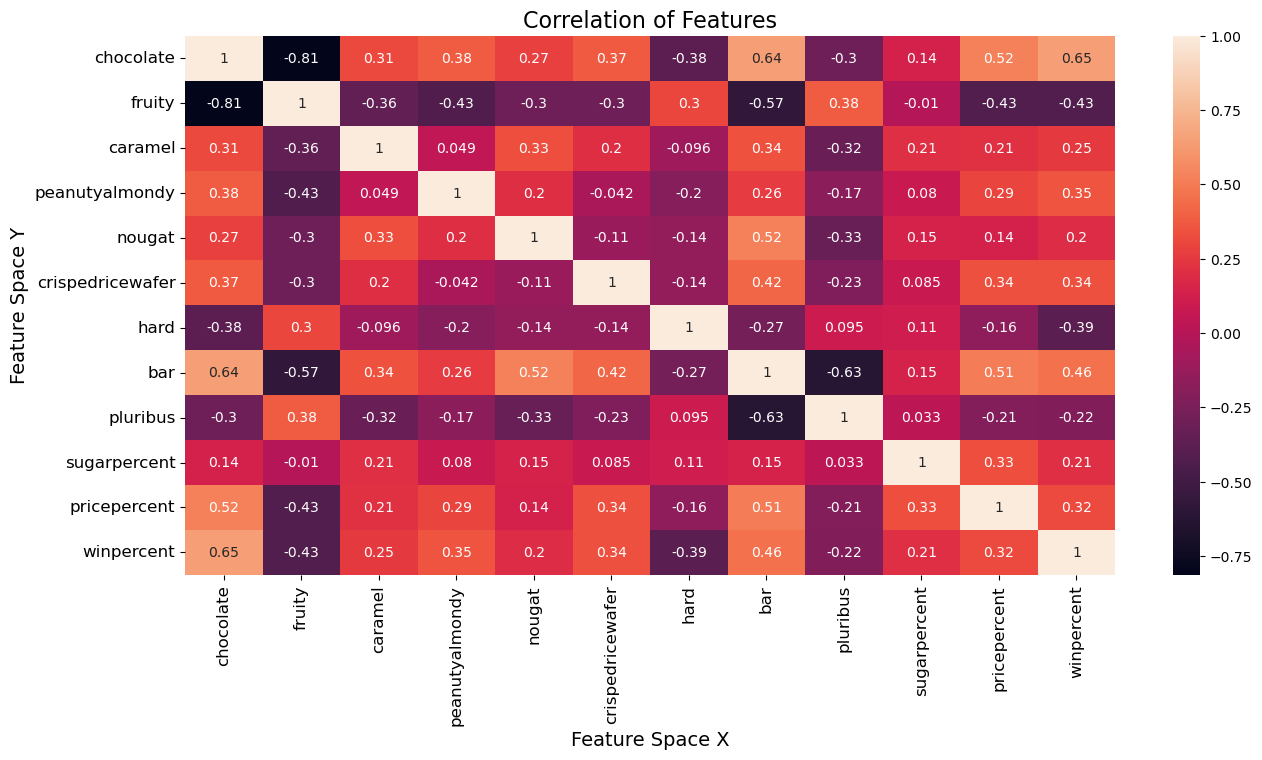

In [363]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()


In [364]:
x = train_df.iloc[:, 1:12]
y = train_df['winpercent']

In [311]:
from sklearn.model_selection import train_test_split

In [365]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [366]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(54, 11)
(14, 11)
(54,)
(14,)


In [367]:
from sklearn.linear_model import LinearRegression

In [368]:
model = LinearRegression()

In [369]:
model.fit(x_train, y_train)

LinearRegression()

In [370]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

Text(0, 0.5, 'Predicted Values')

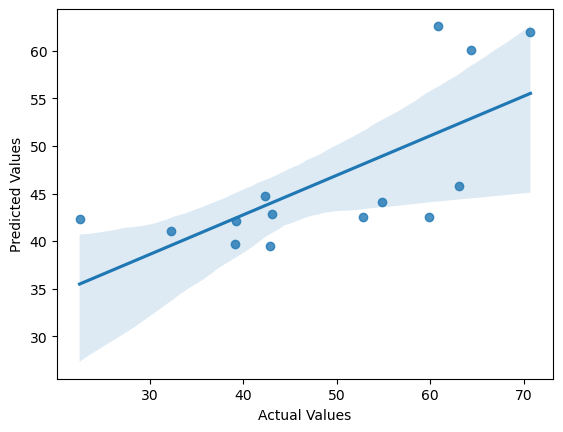

In [371]:
sns.regplot(y_test,pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [372]:
from sklearn import metrics

In [373]:
MAE_train = metrics.mean_absolute_error(y_train, pred_train)
MAE_test = metrics.mean_absolute_error(y_test, pred_test)

In [374]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 8.170776198334433
MAE for test set is 7.774864324676371


In [375]:
MSE_train = metrics.mean_squared_error(y_train, pred_train)
MSE_test = metrics.mean_squared_error(y_test, pred_test)

In [376]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 102.97828299677043
MSE for test set is 101.31842095064242


In [377]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

In [378]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 10.147821588733734
RMSE for test set is 10.065705188939443


In [279]:
from sklearn.tree import DecisionTreeRegressor

In [379]:
dtree = DecisionTreeRegressor(max_depth = 2,random_state = 20)

In [380]:
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=20)

In [381]:
pred_tree_train = dtree.predict(x_train)
pred_tree_test = dtree.predict(x_test)

Text(0, 0.5, 'Predicted Values')

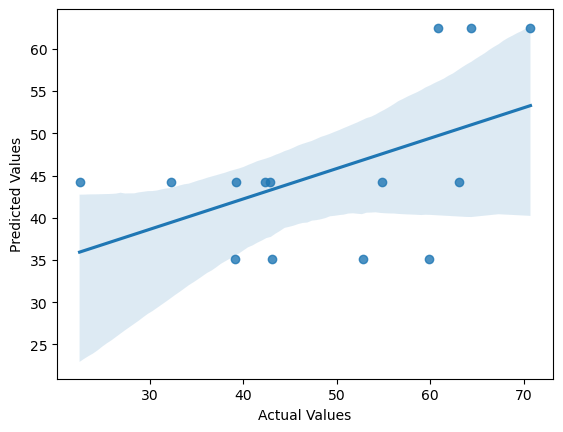

In [382]:
sns.regplot(y_test,pred_tree_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [383]:
MAE_train = metrics.mean_absolute_error(y_train, pred_tree_train)
MAE_test = metrics.mean_absolute_error(y_test, pred_tree_test)

In [384]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 8.29454878319616
MAE for test set is 9.84231554933862


In [385]:
MSE_train = metrics.mean_squared_error(y_train, pred_tree_train)
MSE_test = metrics.mean_squared_error(y_test, pred_tree_test)

In [386]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 107.5169626002318
MSE for test set is 156.96024521317818


In [387]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, pred_tree_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred_tree_test))

In [388]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 10.369038653618368
RMSE for test set is 12.528377597006653


In [290]:
from sklearn.ensemble import RandomForestRegressor

In [389]:
rfr = RandomForestRegressor(n_estimators = 200, random_state = 20)

In [390]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=20)

In [391]:
pred_rfr_train = rfc.predict(x_train)
pred_rfr_test = rfc.predict(x_test)

In [392]:
MAE_train = metrics.mean_absolute_error(y_train, pred_rfr_train)
MAE_test = metrics.mean_absolute_error(y_test, pred_rfr_test)

In [393]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 9.078930388867331
MAE for test set is 8.318217844107513


In [394]:
MSE_train = metrics.mean_squared_error(y_train, pred_rfr_train)
MSE_test = metrics.mean_squared_error(y_test, pred_rfr_test)

In [395]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 127.06691303242931
MSE for test set is 117.91846287504563


In [396]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, pred_rfr_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred_rfr_test))

In [397]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 11.272396064387966
RMSE for test set is 10.859026792261156


Text(0, 0.5, 'Predicted Values')

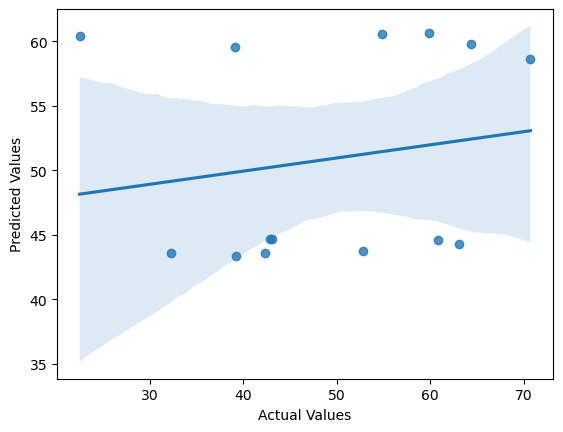

In [398]:
sns.regplot(y_test,pred_rfc_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [399]:
test_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325
1,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116
2,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465
3,Mounds,1,0,0,0,0,0,0,1,0,0.313,0.860
4,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325


In [400]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    17 non-null     object 
 1   chocolate         17 non-null     int64  
 2   fruity            17 non-null     int64  
 3   caramel           17 non-null     int64  
 4   peanutyalmondy    17 non-null     int64  
 5   nougat            17 non-null     int64  
 6   crispedricewafer  17 non-null     int64  
 7   hard              17 non-null     int64  
 8   bar               17 non-null     int64  
 9   pluribus          17 non-null     int64  
 10  sugarpercent      17 non-null     float64
 11  pricepercent      17 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.7+ KB


In [401]:
test_candy = test_df.iloc[:, 1:]

In [402]:
predicted_test = rfr.predict(test_candy)

In [403]:
test_candy['Winpercent'] = predicted_test

In [404]:
test_candy.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Winpercent
0,0,1,0,0,0,0,0,0,1,0.046,0.325,45.714322
1,0,1,0,0,0,0,1,0,0,0.093,0.116,34.596213
2,0,0,0,0,0,0,0,0,1,0.465,0.465,45.215526
3,1,0,0,0,0,0,0,1,0,0.313,0.860,60.763458
4,0,1,0,0,0,0,1,0,1,0.848,0.325,44.652602


In [405]:
test_candy.to_csv('Submission_candy.csv', index = False, header = False)